# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11.7,8.27

In [3]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Заполняем пропуски:

In [6]:
# В разных классах были пассажиры разного возраста. Заполним пропуски 'Age',
# относительно среднего возраста по полу и классу.

titanic['Age'].fillna(titanic.groupby(['Sex', 'Pclass'])['Age'].transform('median'), inplace=True)

In [7]:
# Поскольку у «Embarked» было только два пропущенных значения и наибольшее количество пассажиров 
# отправлялось из Southampton, вероятность посадки в Southampton выше. Заполняем модой.
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [8]:
# Пропуски в номерах кают заполняем 'no_info'. Столбец с номером каюты, не несет полезной информации 
# и в возможно в дальнейшем будут удален

titanic['Cabin'].fillna('no_info', inplace=True)

In [9]:
titanic.head(60)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,no_info,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,no_info,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,no_info,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,no_info,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,no_info,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,no_info,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,no_info,C


#### Предварительный анализ датаста 

<AxesSubplot:>

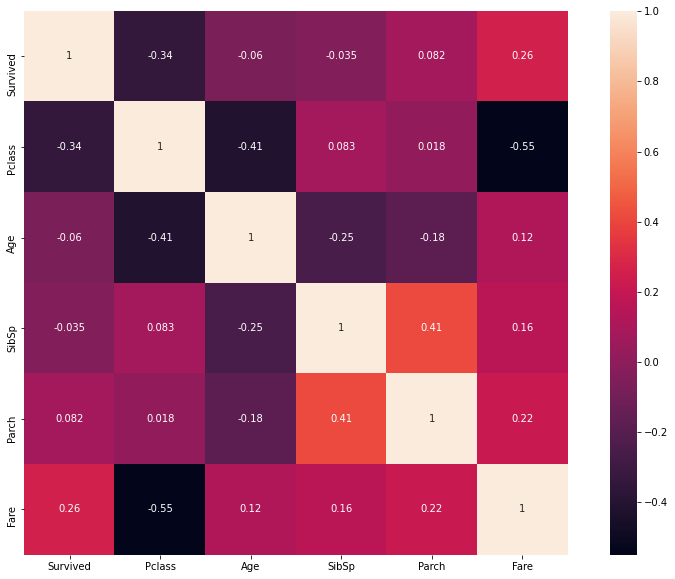

In [10]:
# Рассматривая тепловую карту, видны корреляции между:
#     - Выжившими и стоимостью билетов 
#     - классом и наличием родственников в поездке
#     - возрастом и стоимостью билета
#     - родственными взаимосвязям, что весьма логично!


plt.figure(figsize=(15,10))
sns.heatmap(titanic.drop('PassengerId',axis=1).corr(), square=True, annot=True)

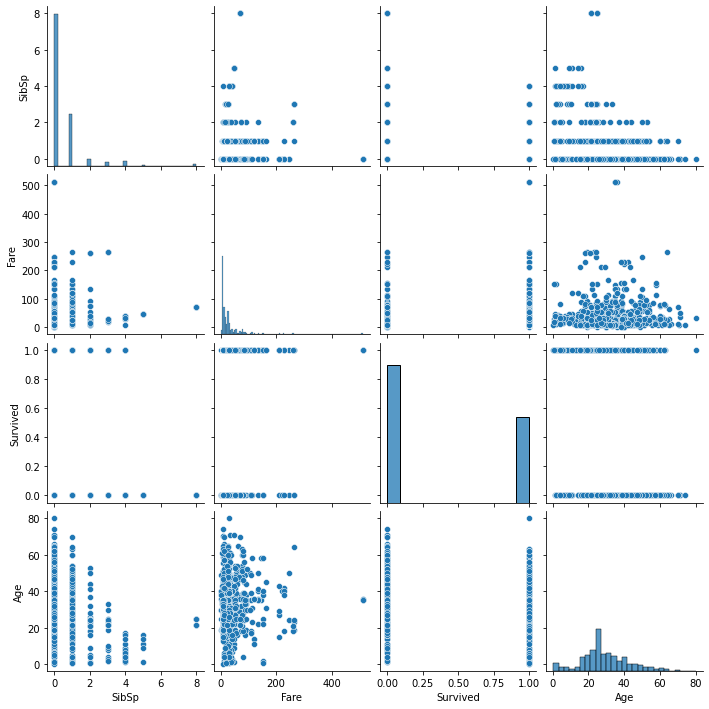

In [11]:
# Точечная диаграмма подтверждает взаимосвязь между возрастом и родственными связями. Больше пассаижиров одиночек и 
# меньше всего пассажиров с большой семьей
# ДаОстальные взаимосвязи требуют дальнейшего изучения

sns.pairplot(titanic[['SibSp', 'Fare', 'Survived','Age']])

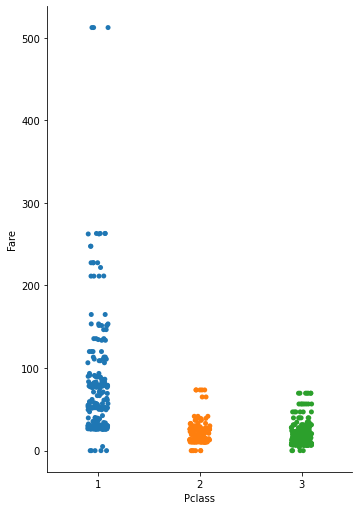

In [12]:
# Стоимость билета по отношению к классу: 
#     Интересен разборс стоимости билета в первом классе. 

sns.catplot(data=titanic,x="Pclass",y="Fare", height=7, aspect=.7)

In [13]:
# Посмотрим на отсортированные данные стоиимости билетов:
# Видим что самые дорогие билеты включали заказ сразу нескольких кают.
# По 0 стоимости билетов либо это подарочный тур, либо билет без стоимости т.к. оплатил родственник, или ошика в данных

top_fare = titanic[['Fare', 'Pclass', 'Cabin']].sort_values('Fare', ascending=False)
top_fare.head()

,Fare,Pclass,Cabin
258,512.3292,1,no_info
737,512.3292,1,B101
679,512.3292,1,B51 B53 B55
88,263.0000,1,C23 C25 C27
27,263.0000,1,C23 C25 C27


In [14]:
top_fare.style.bar(subset=['Pclass', 'Fare'])

,Fare,Pclass,Cabin
258,512.329200,1,no_info
737,512.329200,1,B101
679,512.329200,1,B51 B53 B55
88,263.000000,1,C23 C25 C27
27,263.000000,1,C23 C25 C27
341,263.000000,1,C23 C25 C27
438,263.000000,1,C23 C25 C27
311,262.375000,1,B57 B59 B63 B66
742,262.375000,1,B57 B59 B63 B66
118,247.520800,1,B58 B60


In [15]:
# Вывод: в первом классе есть большие люкс каюты, а так же некоторые пассажиры на семью заказывали несколько кают, 
# отсюда и такой большой разброс в цене 

#### Анализ датасета Титаник по возрасту и полупассажиров, а также классу кают

In [16]:
# Из распределения пассаижиров по возрасту видно, что молодых людей возраста 26-27 лет на Титанике, было больше всего.

Text(0.5, 1.0, 'Распределение пассажиров по возрасту')

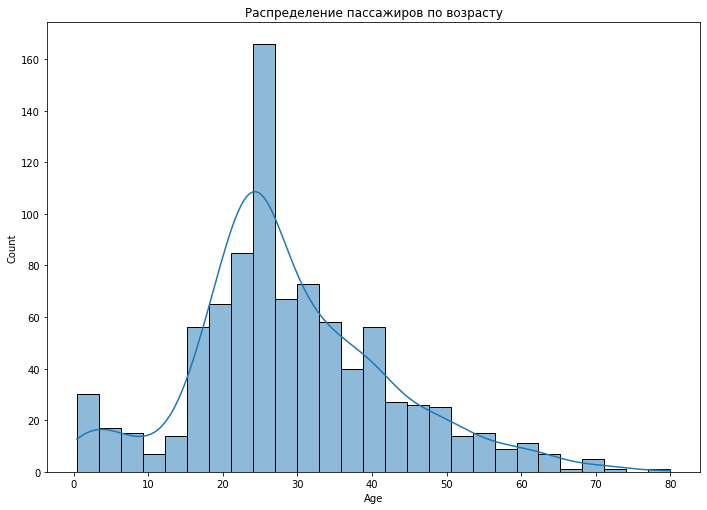

In [17]:
sns.histplot(titanic['Age'], kde=True)
plt.title('Распределение пассажиров по возрасту')

In [18]:
# Среди пассажиров Титаника преобладали пассажиры мужского пола. Я предполагаю, это связано с сексизмом, 
#  т.к. женщины в отличии от мужчин не могли путешествовать одни.

<AxesSubplot:xlabel='Age', ylabel='Count'>

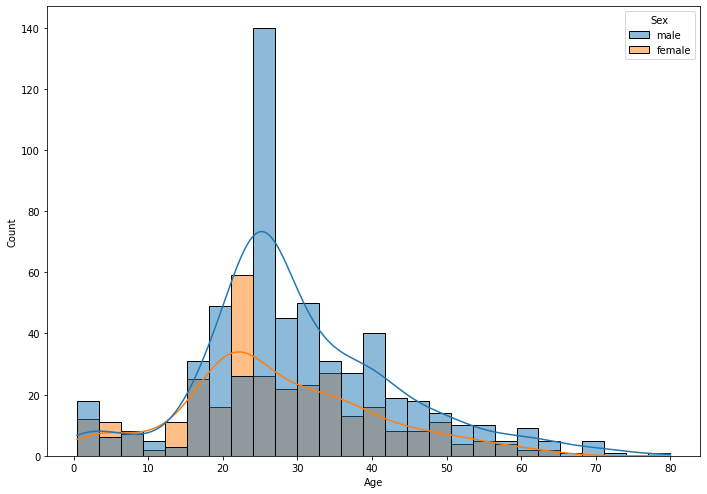

In [19]:
sns.histplot(x=titanic['Age'], hue=titanic['Sex'],  kde=True)

In [20]:
# Из распределения пассаижиров по классу и возрасту видно, что самые молодые пассажиры - это пассажиры 3го класса. 
# Это могло быть связано с авантюризмом молодых людей начать новую жизнь в Америке.
# Чем старше человек — тем его благосостояние выше и выше уровень комфорта, и это видно на визуалицтии пассажиров 1го класса 

Text(0.5, 1.0, 'Распределение пассажиров по возрасту и по классу ')

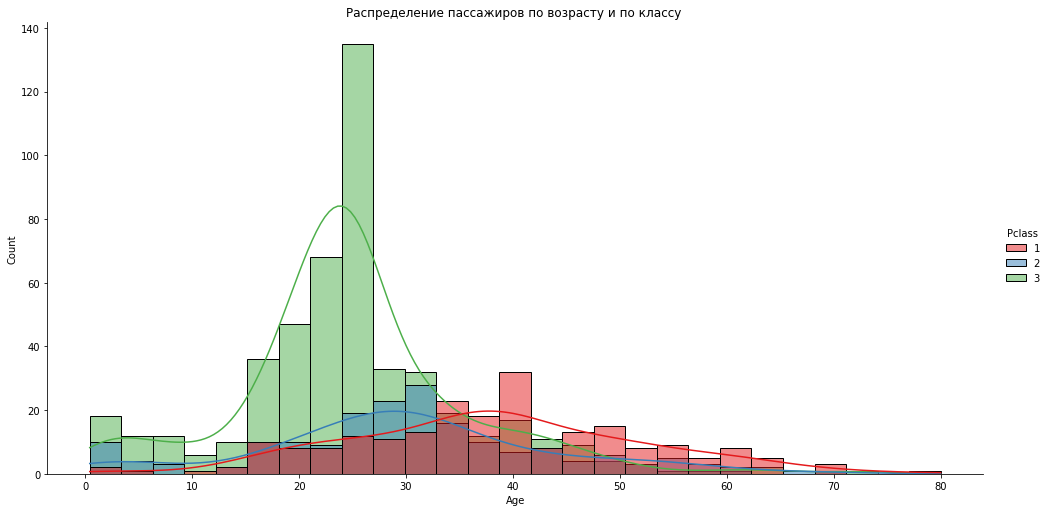

In [21]:
sns.displot(x=titanic['Age'], hue=titanic['Pclass'], palette='Set1', height=7, aspect=2, kde=True)
plt.title('Распределение пассажиров по возрасту и по классу ')

In [22]:
# Изначально мужчин было больше на корабле и по идеи число выживших мужчин должно было быть больше.  
# Но из-за того что в первую очередь эвакуировали детей и женщин, баланс вышивших сместился в сторону вторых.

#### Анализ погибших и выживших

Text(0.5, 0, 'Пол')

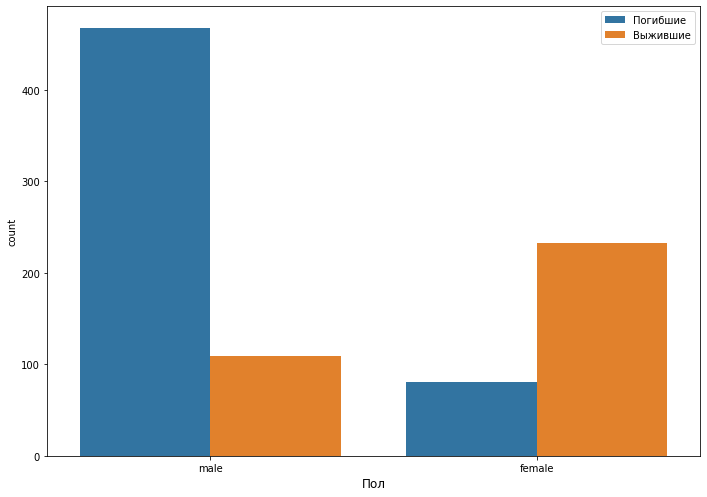

In [23]:
# Число погибших и выживших среди мужчин и женщин. Мужчин погибло в два раза больше чем женщин

cp = sns.countplot(x=titanic.Sex, hue=titanic.Survived)
plt.legend(("Погибшие", "Выжившие"))
cp.set_xlabel("Пол", fontsize=12)

In [24]:
# Количество пассажиров для каждого класса кают 
titanic['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

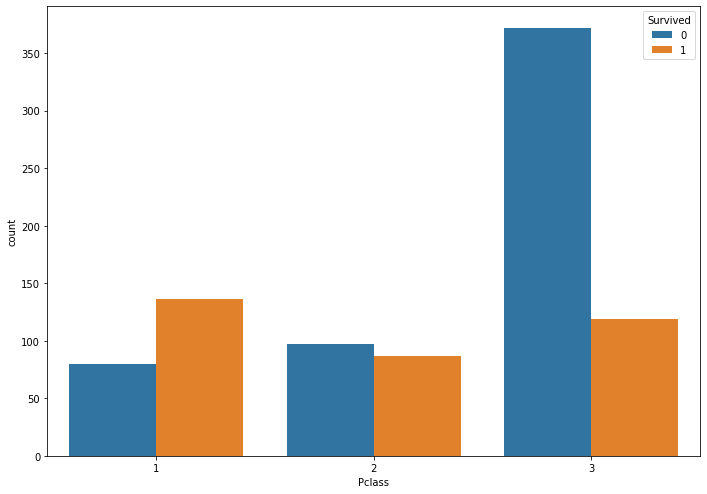

In [27]:
# Посмотрим на распределение по полу и по класссам среди выживших и погибших
# Наглядно видно, что пасссажиров 3го класса погибло больше всего и исходя из анализа выше это были мужчины.

sns.countplot(x='Pclass', hue='Survived', data=titanic)

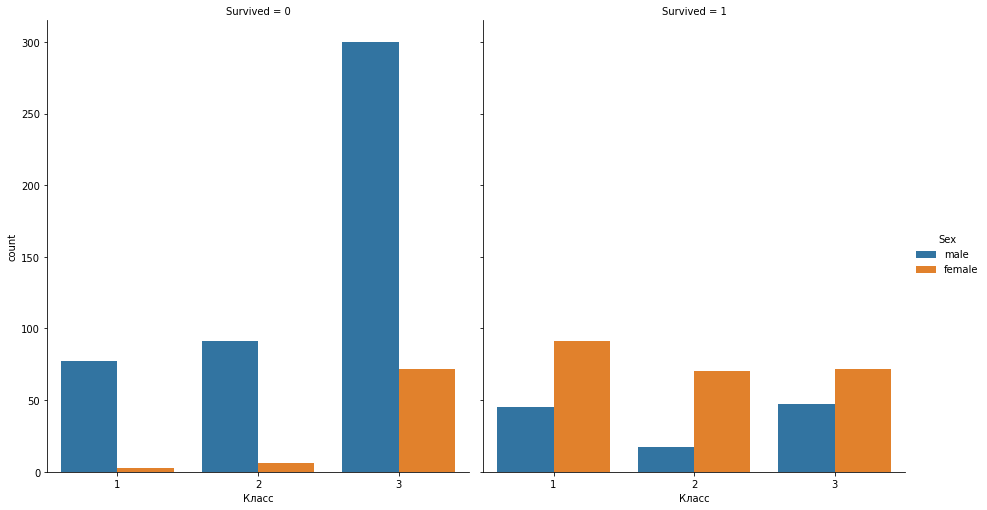

In [53]:
# Чем выше класс билета тем больше выживших. Это связано с размещение кают
#  (каюты первого класса находились на верхних палубах)

catp = sns.catplot(x="Pclass", hue="Sex", col="Survived", data=titanic, kind="count",
                height=7, aspect=.9)
catp.set_axis_labels("Класс")

Text(0.5, 1.0, 'Мужчины')

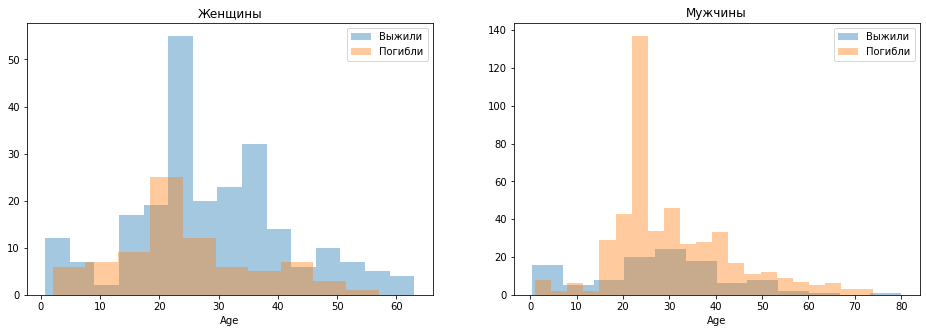

In [35]:
# Посмотрим на распределение погибших и выживших, мужчин и женщин по возврастам
# Большое количесвто выживших, это женщины 22-25 лет, у мужчин же наоборот, молодых людей этого возраста погибло больше всего

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 5))

ax = sns.distplot(titanic[(titanic.Sex=='female') & (titanic.Survived==1)]['Age'], label='Выжили', 
                  kde=False, ax=axes[0])
ax = sns.distplot(titanic[(titanic.Sex=='female') & (titanic.Survived==0)]['Age'], label='Погибли',
                  kde=False, ax=axes[0])
ax.legend()
ax.set_title("Женщины")
ax = sns.distplot(titanic[(titanic.Sex=='male') & (titanic.Survived==1)]['Age'],label='Выжили',
            kde=False, ax=axes[1])
ax = sns.distplot(titanic[(titanic.Sex=='male') & (titanic.Survived==0)]['Age'],label='Погибли',
            kde=False, ax=axes[1])
ax.legend()
ax.set_title("Мужчины")

Text(0, 0.5, 'Возраст')

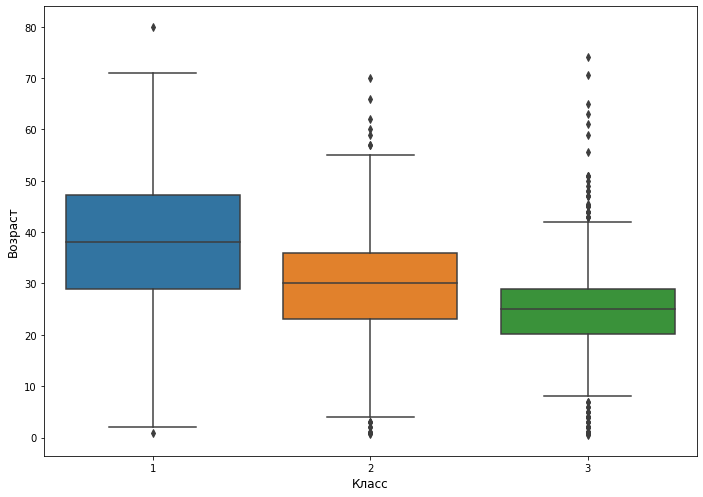

In [30]:
# С помощью ящика с усами можем увидеть, что среди пассажиров первого класса были возрастные люди (медиана = 38 лет),
# детей мало.
# Второй класс в целом сбалансирован по возрастам
# Еще раз убеждаемся что в третьем классе основную массу составляли молодые люди, но также видно что было много детей 
# и людей старшего возраста

bp = sns.boxplot(x="Pclass", y="Age", data=titanic)
bp.set_xlabel("Класс", fontsize=12)
bp.set_ylabel("Возраст", fontsize=12)

Text(0, 0.5, 'Возраст')

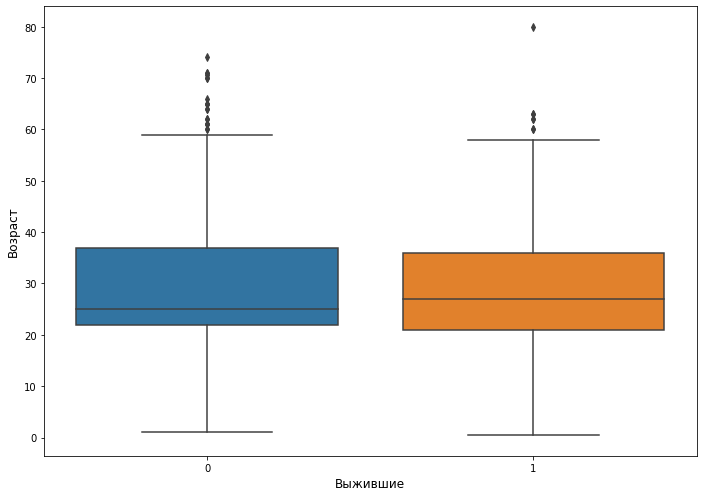

In [31]:
# Из следующей визуализации видно,что среди выживших есть пожилые люди, которым удалось спастись
# Но большая часть пожилых людей погибла

bp = sns.boxplot(x="Survived", y="Age", data=titanic)
bp.set_xlabel("Выжившие", fontsize=12)
bp.set_ylabel("Возраст", fontsize=12)

Text(0.5, 1.0, 'Training Data - Survival based on embarking point.')

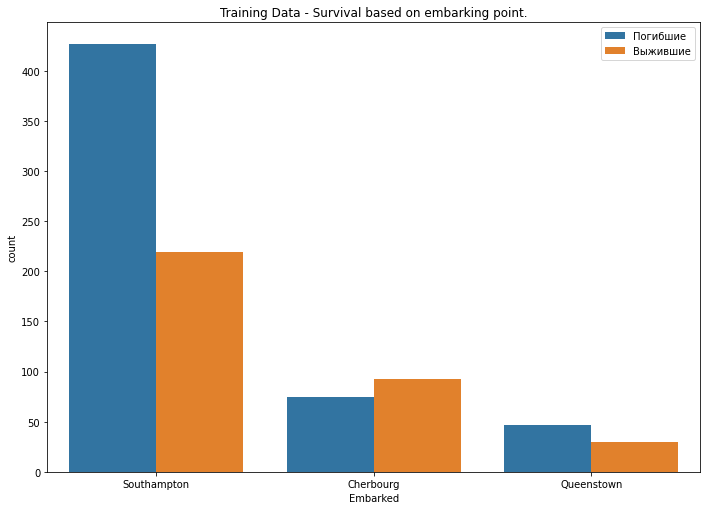

In [32]:
# Информация о порте отплытия, сильной смысловой нагрузки не несет.
# Больше всего погибло пассажиров, которые сели на корабль в порту Саутгемптона. Но так как это был порт отплытия, 
# то взаимосвязь очевидна. 

p = sns.countplot(x = "Embarked", hue = "Survived", data =titanic)
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.legend(labels = ["Погибшие", "Выжившие"])
p.set_title("Training Data - Survival based on embarking point.")

 ### <span style="color:red">**Выводы о шансах выжить в катастфоре очевиды:** </span> 
- больше всего спастись могла молодая пассажирка первого класса
- меньше всего шансов выжить у мужчины среднего возраста из 3 класса 

<span style="color:red"> P.S. Теперь понятно, почему в одноименном фильме герой Лео Дикаприо погиб. Т.к. фильм построен на реальных событиях, по статистике он должен был погибнуть (пассажир 3го класса, мужчина)</span> 

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.